<a href="https://colab.research.google.com/github/FelipeFerAl/SignalProcessing/blob/main/TareaFiltros(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías y Funciones

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import filtfilt, butter, bessel

In [6]:
#@title Funciones
def señal(frequencies, sample):
  A = 1
  time = np.linspace(0, 1, sample)
  total_signal = np.zeros(sample)
  for freq in frequencies:
    signal = A * np.sin(2 * np.pi * freq * time)
    total_signal = signal+total_signal
  total_signal = total_signal + np.random.normal(0, 0.3, sample)
  return time, total_signal

def pulso(freq_vector, frequencies):
  rect_signal = np.where((freq_vector >= frequencies[0]) & (freq_vector <= frequencies[1]), 1, 0)
  rect_signal += np.where((freq_vector <= -frequencies[0]) & (freq_vector >= -frequencies[1]), 1, 0)
  return rect_signal

# Código

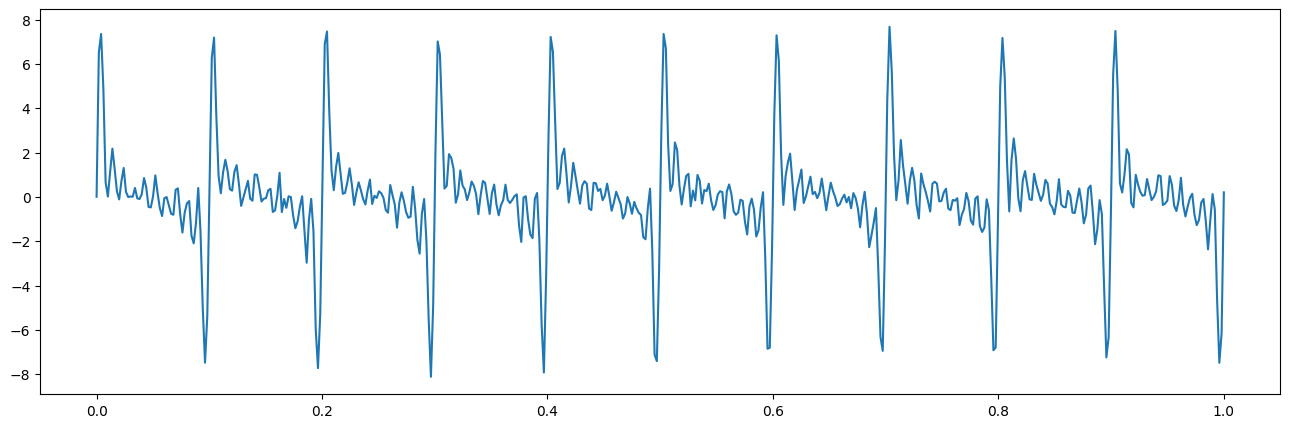

In [11]:
# Señal en el tiempo
time, signal = señal([10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 500)

plt.figure(figsize=(16, 5))
plt.plot(time, np.real(signal))
plt.show()

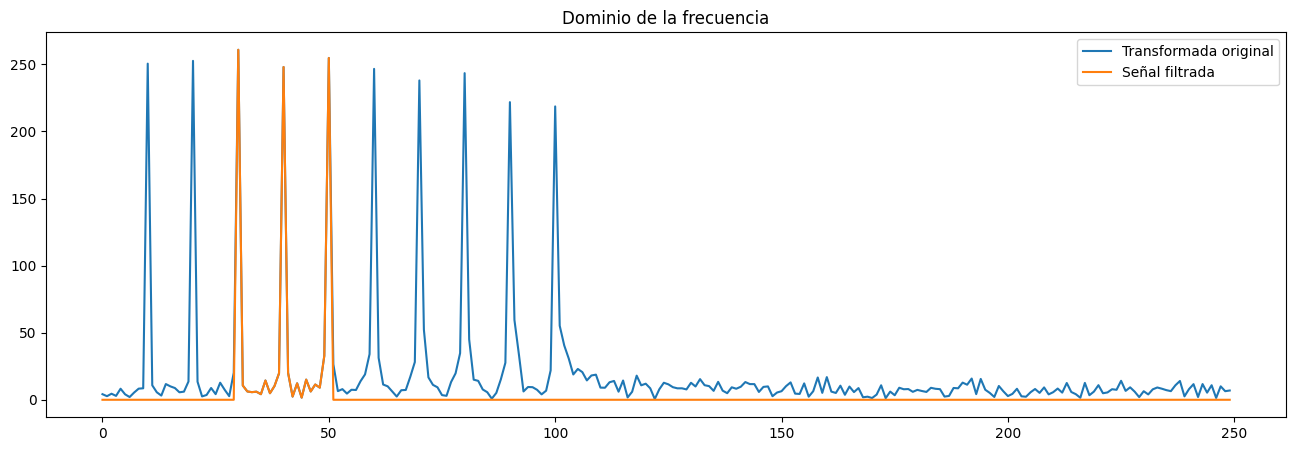

In [20]:
# Transformación de la señal original
trans = np.fft.fft(signal)
freq = np.fft.fftfreq(len(signal),1/500)

# Pulso cuadrado para filtrado
rect_filt = pulso(freq, [30,50])
filt_signal = rect_filt * trans

plt.figure(figsize=(16, 5))
plt.plot(freq[:len(freq)//2], np.abs(trans[:len(trans)//2]), label='Transformada original')
plt.plot(freq[:len(freq)//2], np.abs(filt_signal[:len(trans)//2]), label='Señal filtrada')
plt.title('Dominio de la frecuencia')
plt.legend()
plt.show()

In [13]:
# Inversa de la señal filtrada
inverse_signal = np.fft.ifft(filt_signal)

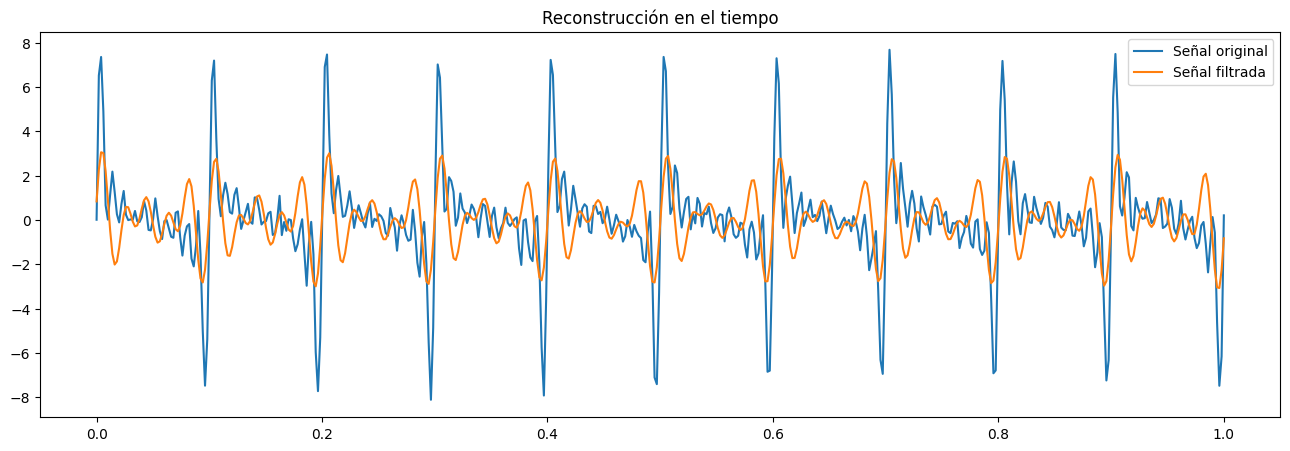

In [19]:
plt.figure(figsize=(16, 5))
plt.plot(time, signal, label='Señal original')
plt.plot(time, np.real(inverse_signal), label='Señal filtrada')
plt.title('Reconstrucción en el tiempo')
plt.legend()
plt.show()

# Ensayos con otros filtros de scipy

In [ ]:
#establecemos valores iniciales que aplicarán a cada filtro
filtro='bandpass'
normal='mag'
out='ba'
orden=3
frec=[60,80]

#hallamos las constantes numerador/denominador de cada filtro
a, b = butter(orden,frec,btype=filtro,output=out,fs=500)
c, d = bessel(orden,frec,btype=filtro,output=out,norm=normal,fs=500)

#Filtramos la señal por cada configuración
X_butter = filtfilt(a,b,signal)
X_bessel = filtfilt(c,d,signal)

In [ ]:
plt.figure(figsize=(16,8))

plt.subplot(211)
plt.plot(time,X_butter)
plt.title('Filtro Butterworth')

plt.subplot(212)
plt.plot(time,X_bessel)
plt.title('Filtro Bessel')

plt.show()

In [ ]:
#Transformadas
butter_t = np.fft.fft(X_butter)
bessel_t = np.fft.fft(X_bessel)

plt.figure(figsize=(16,8))

plt.subplot(211)
plt.plot(freq[:len(freq)//2], np.abs(butter_t[:len(trans)//2]))
plt.title('Filtro Butterworth')

plt.subplot(212)
plt.plot(freq[:len(freq)//2], np.abs(bessel_t[:len(trans)//2]))
plt.title('Filtro Bessel')

plt.show()